# Supermarket Sales Data Analysis

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of a supermarket company, recorded in 3 different branches for 3 months data. The data set can be downloaded directly from [this link](https://www.kaggle.com/aungpyaeap/supermarket-sales?select=supermarket_sales+-+Sheet1.csv).

My aim is to understand many scenarios in the sales of products in the Supermarket across its 3 different branches in the 3 different cities. I try to understand how the income of the customers/neighborhood influences the type of the products purchased, if the type of the customers(member or non-member) influences the sales and rating. I also perform  a correlation analysis to realize that the number of products bought by consumers is highly correlated with Tax 5%, total sales, cost of goods sold and gross income.

I also analyze the trend of sales along with the total sales that occurs across the 3 branches. After this, I build models and compared the accuracy across them to find the best one that can predict the 'Quantity', that is, the number of products that will be purchased by customers.


## Dataset Attribute Information

Invoice id:  Computer generated sales slip invoice identification number. <br>
Branch:  Branch of supercenter (3 branches are available identified by A, B and C). <br>
City:  Location of supercenters.<br>
Customer type:  Type of customers, recorded by Members for customers using member card and Normal for without member card. <br>
Gender:  Gender type of customer. <br>
Product line:  Categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel. <br>
Unit price:  Price of each product in $. <br>
Quantity:  Number of products purchased by customer. <br>
Tax:  5% tax fee for customer buying. <br>
Total:  Total price including tax. <br>
Date:  Date of purchase (Record available from January 2019 to March 2019). <br>
Time:  Purchase time (10am to 9pm). <br>
Payment:  Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet). <br>
COGS:  Cost of goods sold. <br>
Gross margin percentage:  Gross margin percentage. <br>
Gross income:  Gross income of customers. <br>
Rating:  Customer stratification rating on their overall shopping experience (On a scale of 1 to 10). <br>


In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Reading the data

In [313]:
sales = pd.read_csv('supermarket_sales - Sheet1.csv')
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [314]:
sales.shape

(1000, 17)

The dataframe has 1000 rows and 17 columns.

In [315]:
sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

## Performing Data Preprocessing

From the previous command, we can see that the data type of the 'Date' column is an object. However, we know that this column must support a date type functionality. So, I performed a basic data manipulation on the Date feature ('Date' column) and the Time feature ('Time' column). Both these columns should follow a date and timestamp functionality, so that it will be easier to fetch the derived functionalities from this.

In [316]:
sales['Date'][0]

'1/5/2019'

In [317]:
type(sales['Date'][0])

str

In [318]:
#to convert string into datetime values
from pandas import to_datetime
sales['Date'] = to_datetime(sales['Date'])

In [319]:
type(sales['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [320]:
#to convert string into timestamp values
sales['Time'] = to_datetime(sales['Time'])

In [321]:
type(sales['Time'][0])

pandas._libs.tslibs.timestamps.Timestamp

## Fetching Derived Attributes

Fetching Derived Attributes for date and time can be done using 3 ways:

1.) Using a function 

2.) Using Lambda

3.) Using Date Time module

In [322]:
sales['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [323]:
sales['Time']

0     2021-12-30 13:08:00
1     2021-12-30 10:29:00
2     2021-12-30 13:23:00
3     2021-12-30 20:33:00
4     2021-12-30 10:37:00
              ...        
995   2021-12-30 13:46:00
996   2021-12-30 17:16:00
997   2021-12-30 13:22:00
998   2021-12-30 15:33:00
999   2021-12-30 13:28:00
Name: Time, Length: 1000, dtype: datetime64[ns]

From the above command we can see that the date is of the format 'YYYY-MM-DD'. These are the attributes that I have derived from this Date feature. In a similar way, I can derive the time attributes from the Time feature, which is in the format 'HH-MM-SS'.

#### 1.) Using a function 

I use a function to extract the day, month and year feature. And then use the apply feature on this function.

In [324]:
# Function that returns a Day, Month and Year 
def fetchdate1_attribute(x):
    day = x.day
    month = x.month
    year = x.year
    return [day, month, year]

In [325]:
sales['Date'].apply(fetchdate1_attribute)

0       [5, 1, 2019]
1       [8, 3, 2019]
2       [3, 3, 2019]
3      [27, 1, 2019]
4       [8, 2, 2019]
           ...      
995    [29, 1, 2019]
996     [2, 3, 2019]
997     [9, 2, 2019]
998    [22, 2, 2019]
999    [18, 2, 2019]
Name: Date, Length: 1000, dtype: object

In [326]:
# Performing the same function above but now, storing it as a pandas series
def fetchdate_attribute(x):
    day = x.day
    month = x.month
    year = x.year
    return pd.Series([day, month, year])

In [327]:
sales['Date'].apply(fetchdate_attribute)

,0,1,2
0,5,1,2019
1,8,3,2019
2,3,3,2019
3,27,1,2019
4,8,2,2019
...,...,...,...
995,29,1,2019
996,2,3,2019
997,9,2,2019
998,22,2,2019


In [328]:
# Storing the Day, Month and Year as separate columns
sales[['Day','Month','Year']] = sales['Date'].apply(fetchdate_attribute)

In [329]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2021-12-30 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2021-12-30 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2021-12-30 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2021-12-30 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2021-12-30 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019


#### 2.) Using Lambda

I use lambda inside the apply function. This is an optimal way of defining a function and applying a function on top of any feature we have.

In [330]:
sales['Date'].apply(lambda x:x.day)

0       5
1       8
2       3
3      27
4       8
       ..
995    29
996     2
997     9
998    22
999    18
Name: Date, Length: 1000, dtype: int64

In [331]:
sales['Date'].apply(lambda x:x.month)

0      1
1      3
2      3
3      1
4      2
      ..
995    1
996    3
997    2
998    2
999    2
Name: Date, Length: 1000, dtype: int64

In [332]:
sales['Date'].apply(lambda x:x.year)

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
995    2019
996    2019
997    2019
998    2019
999    2019
Name: Date, Length: 1000, dtype: int64

#### 3.) Using Date Time module

Using the Date Time module, I can call some inbuilt functions to get the final output.

In [333]:
sales['Date'].dt.day

0       5
1       8
2       3
3      27
4       8
       ..
995    29
996     2
997     9
998    22
999    18
Name: Date, Length: 1000, dtype: int64

In [334]:
sales['Date'].dt.month

0      1
1      3
2      3
3      1
4      2
      ..
995    1
996    3
997    2
998    2
999    2
Name: Date, Length: 1000, dtype: int64

In [335]:
sales['Date'].dt.year

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
995    2019
996    2019
997    2019
998    2019
999    2019
Name: Date, Length: 1000, dtype: int64

In [336]:
# Checking the columns
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Day', 'Month', 'Year'],
      dtype='object')

In [337]:
#Applying the lambda function to extact the derived attributes from the time feature
sales['Time'].apply(lambda x:x.hour)

0      13
1      10
2      13
3      20
4      10
       ..
995    13
996    17
997    13
998    15
999    13
Name: Time, Length: 1000, dtype: int64

In [338]:
sales['Time'].apply(lambda x:x.minute)

0       8
1      29
2      23
3      33
4      37
       ..
995    46
996    16
997    22
998    33
999    28
Name: Time, Length: 1000, dtype: int64

In [339]:
sales['Time'].apply(lambda x:x.second)

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Time, Length: 1000, dtype: int64

In [340]:
# Storing the Hour, Minute and Second as separate columns

sales['Hour'] = sales['Time'].apply(lambda x:x.hour)
sales['Minute'] = sales['Time'].apply(lambda x:x.minute)
sales['Second'] = sales['Time'].apply(lambda x:x.second)
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute,Second
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,5,1,2019,13,8,0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,8,3,2019,10,29,0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,324.31,4.761905,16.2155,7.4,3,3,2019,13,23,0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,465.76,4.761905,23.2880,8.4,27,1,2019,20,33,0
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,604.17,4.761905,30.2085,5.3,8,2,2019,10,37,0


We finally get a dataframe that has the Day, Month, Year, Hour, Minute and Second as separate columns

In [341]:
print("\n")

## Finding the Correlation among the variables 

In [342]:
# Using transpose for viewing the descriptive statistics
sales.describe().T 

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000
Day,1000.0,15.256000,8.693563,1.000000,8.000000,15.000000,23.000000,31.000000
Month,1000.0,1.993000,0.835254,1.000000,1.000000,2.000000,3.000000,3.000000


The 25th percentile, 50th percentile and 75th percentile basically tells us the measure used in statistics indicating the value below which a given percentage of observations in a group of observations fall. For instance, if we consider the Unit price, then we can say that 25% of the data for unit price lies below 32.875, 50% of the data lies below 55.23 and 75% of the data lies below 77.935. 

The 25th percentile is also called as the 1st Quartile. The  50th percentile and 75th percentile are called the 2nd Quartile and the 3rd Quartile respectively. 

In [343]:
# Checking the correlation of the values
sales.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute,Second
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,0.057021,-0.027387,NaN,0.008242,-0.006869,NaN
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,-0.043347,-0.014524,NaN,-0.007317,-0.014929,NaN
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770,-0.027480,NaN
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770,-0.027480,NaN
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770,-0.027480,NaN
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770,-0.027480,NaN
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,-0.007076,-0.042880,NaN,-0.030588,0.050558,NaN
Day,0.057021,-0.043347,-0.002515,-0.002515,-0.002515,NaN,-0.002515,-0.007076,1.000000,-0.118996,NaN,0.020668,0.012645,NaN
Month,-0.027387,-0.014524,-0.022301,-0.022301,-0.022301,NaN,-0.022301,-0.042880,-0.118996,1.000000,NaN,0.043762,-0.006554,NaN


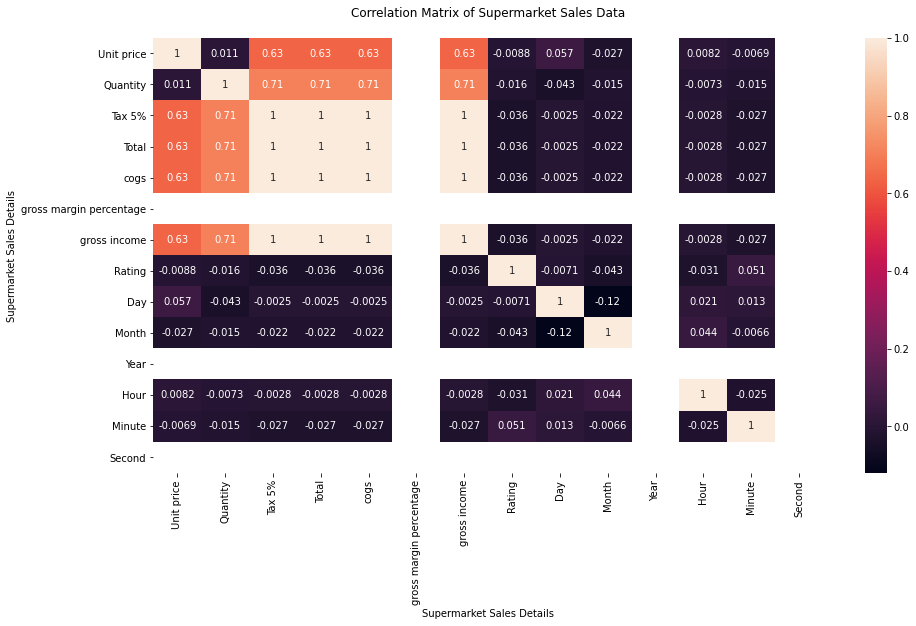

In [344]:
import seaborn as sns

plt.figure(figsize = (15,8))
hm = sns.heatmap(sales.corr(), annot = True) # annot = True displays the correlation values in the plot
#plt.savefig("Plotting_Correlation_HeatMap.jpg")
#plt.gcf().set_size_inches(15, 8)
hm.set(xlabel = 'Supermarket Sales Details', ylabel = 'Supermarket Sales Details', title = "Correlation Matrix of Supermarket Sales Data\n")
plt.show()
print("\n")

This will plot the correlation as a heatmap as shown above.

The correlation matrix denotes the correlation coefficients between variables at the same time. A heat map grid can represent these coefficients to build a visual representation of the variables’ dependence. This visualization makes it easy to spot the strong dependencies. A positive correlation indicates a strong dependency, while a negative correlation indicates a strong inverse dependency; a correlation coefficient closer to zero indicates weak dependence. The correlation values that have NaN is shown or represented as a white box. Hence, the corresponding rows and columns for 'gross margin percentage', 'Year' and 'Second'  are shown as a white box.

Here, I can see that 'Quantity' is highly correlated with Tax 5%, Total, Cogs and gross income. Similarly, 'Unit Price' is also highly correlated with Tax 5%, Total, Cogs and gross income. I can say that if the 'Unit Price' increases, there is a 63% probability that the Tax 5% also increases.

Also, if the gross income increases there is a 100% probability that the Tax 5% also increases by the same factor.

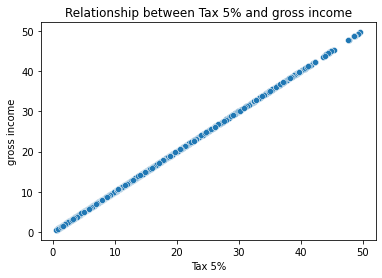

In [345]:
# Using scatter plot to visualize the relationship between Tax 5% and gross income
a = sns.scatterplot(x = 'Tax 5%', y = 'gross income', data = sales)
a.set(xlabel = 'Tax 5%', ylabel = 'gross income', title = "Relationship between Tax 5% and gross income")
plt.show()

I can see that the graph above between 'Tax 5%' and 'gross income' has a slope of 1. This means they have a correlation of 1.

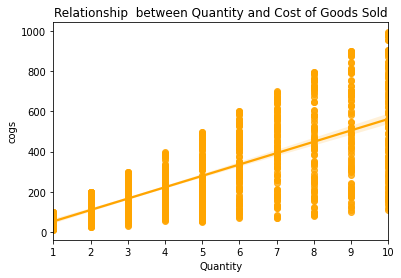

In [346]:
# Using regression plot to visualize the relationship between Quantity and Cost of Goods Sold
b = sns.regplot(x = 'Quantity', y = 'cogs', data = sales, color = 'orange')
b.set(xlabel = 'Quantity', ylabel = 'cogs', title = "Relationship  between Quantity and Cost of Goods Sold")
plt.show()

Since, I have included the trend line, that is, fitting a line that follows the data points, I can see that the graph above between 'Quantity' and cost of goods sold 'cogs' has a slope of 0.71. This means they have a correlation of 0.71.

## Perfoming Descriptive Analysis on the data

Diving deeper into the data analysis, I want to find the following things:

1.) The city that has the most gross income

2.) Find the mean rating and visualize it

3.)The city that has the most sales

#### The city that has the most gross income

In [347]:
sales['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

I can approach the task to find the city that has the most gross income by two ways. Firstly, I can use a filter to select whichever city I want to select and then compute the median of the gross income. However, this approach becomes cumbersome if there are say, 20 or 50 unique cities. The second approach that I can use is the groupby function. So, I groupby the city and then calculate the median of the gross income.

I used the median of the gross income as the median is insensitive to the outliers. Median is the 50th percentile or exactly the middle observation. The mean can show some skewness in case there are outliers. Hence, I do not use the mean function.



In [348]:
city_median_income = sales.groupby(['City'])['gross income'].median()
city_median_income_sorted = city_median_income.sort_values(ascending = False)
city_median_income_sorted

City
Naypyitaw    12.92475
Mandalay     12.04200
Yangon       11.46800
Name: gross income, dtype: float64

We can see that Naypyitaw is the city that has the most gross income.

#### The city that has the most sales

In [349]:
city_median_sales = sales.groupby(['City'])['Total'].median()
city_median_sales_sorted = city_median_sales.sort_values(ascending = False)
city_median_sales_sorted

City
Naypyitaw    271.41975
Mandalay     252.88200
Yangon       240.82800
Name: Total, dtype: float64

We can see that Naypyitaw is the city that has the most sales compared to the other branches.

#### Finding the mean rating and visualizing it

In [350]:
sales['Rating'].mean()

6.9727

In [351]:
#using numpy
np.mean(sales['Rating'])

6.9727

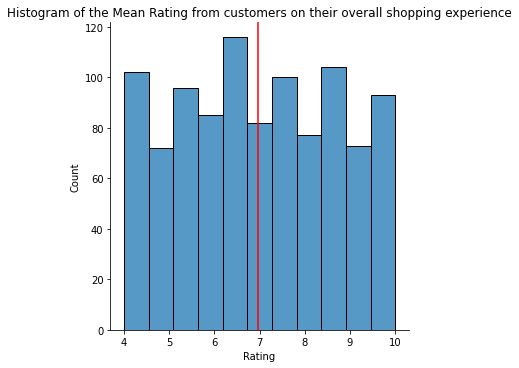

In [352]:
c = sns.displot(sales['Rating'], kde = False) #setting the kernel density as false
plt.axvline(x = np.mean(sales['Rating']), color = 'Red', label = 'Average Rating of Customers') # adding a vertical line across the axes
c.set(title = "Histogram of the Mean Rating from customers on their overall shopping experience")
plt.show()
print("\n")

## Perfoming In-Depth Analysis on the data using functions

By defining custom functions, we can pass on different parameters say the 'Gender', 'Payment' or 'City' to give me a distribution. Or if I want to get a trend of the different features such as the 'Total' or 'Gross Income', I can just define a line plot inside a function and call the same function as an when needed. 

Diving deeper into the data analysis, I want to find the following things:

1.) Analyzing the distribution of various Branches

2.) Analyzing the trend of sales

3.) How much sales occurs in each a every Branch of the supermarket with respect to the year?

4.) Analyzing the Branch Total Sales per hour in a monthly fashion

5.) When do the customers buy certain products in various branches?

6.) Performing Product Analysis

7.) Finding a relationship between gross income and product line

8.) How do customers make the payment in the supermarket?

9.) Does the customer type influence the sales?

10.) Does the customer type influence customer rating?

11.) Number of Branches across the different cities

12.) Distribution of the Product Line across the Branches

####  Analyzing the distribution of various Branches

In [353]:
# Defining all the functions

def return_countplot(column, hue_name = None):
    return sns.countplot(x = column, data = sales, hue = hue_name)

def return_boxplot(x_column, y_column):
    return sns.boxplot(x = x_column, y = y_column, data = sales)

def return_lineplot(x_column, y_column):
    return sns.lineplot(x = x_column, y = y_column, data = sales)

def return_rel_plot(x_col, y_col, col_name = None, row_name = None, rel_type = None, hue_name = None, style_name = None ):
    return sns.relplot(x = x_col, y = y_col, col = col_name, row = row_name, kind = rel_type, hue = hue_name, style = style_name, data = sales)

In cases when we need to show the descriptive statistics along with the distribution and the 5 point summary statistics (minimum, 25th percentile, 50th percentile, 75th percentile and maximum), we can use the boxplot.

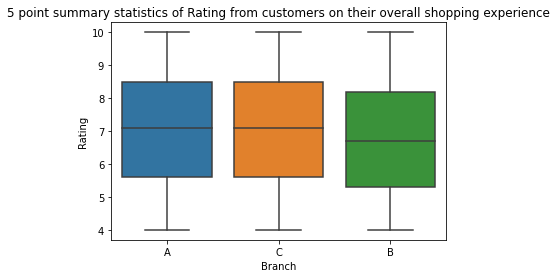

In [354]:
d = return_boxplot('Branch','Rating')
d.set(title = "5 point summary statistics of Rating from customers on their overall shopping experience")
plt.show()

We can see from the above boxplot that the Branch B has the lowest rating of approximately 5.5 compared to the other two Branches A and C, which have a minimum rating of approximately 5.7.

#### Analyzing the trend of sales

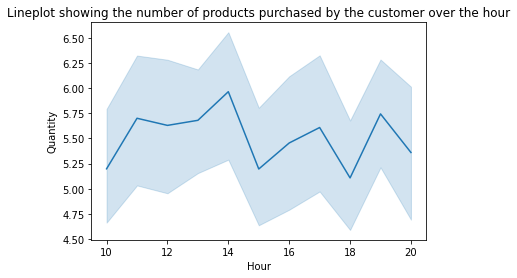

In [355]:
e = return_lineplot('Hour','Quantity')
e.set(title = "Lineplot showing the number of products purchased by the customer over the hour")
plt.show()

This shows that the maximum purchase made by the customers is around 2pm and gradually decreases after 8pm as the supermarket closes.

#### How much sales occurs in each a every Branch of the supermarket with respect to the year?

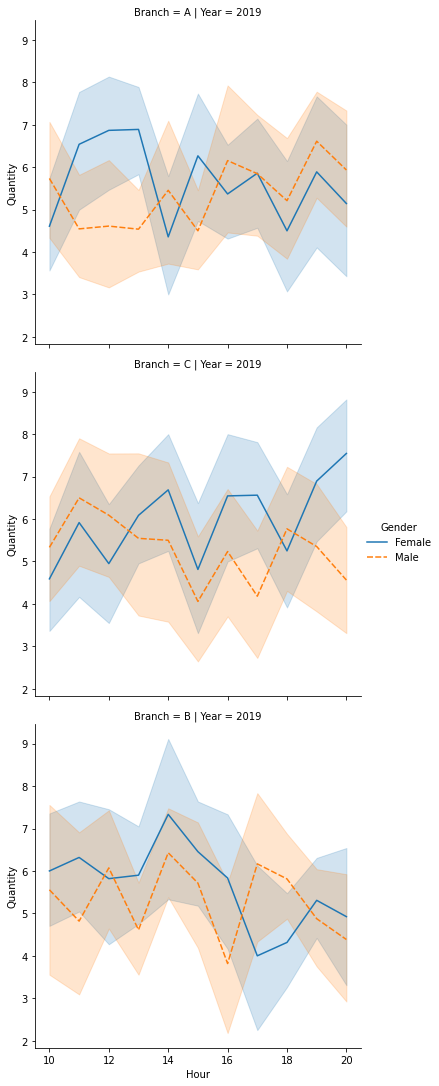

In [356]:
f = return_rel_plot(x_col = 'Hour', y_col = 'Quantity', col_name = 'Year', row_name = 'Branch', rel_type = 'line', hue_name = 'Gender', style_name = 'Gender')
#f.set(title = "Number of products purchased by customers from each of the Supermarket Branches A, B and C with respect to the year")
plt.show()

This shows us that the majority of the products purchased by customers from Branch A occurs between 12:00 to 1:00pm,   around 7:30 to 8:00pm from Branch C and around 2:00pm from Branch B. 

#### Analyzing the Branch Total Sales per hour in a monthly fashion

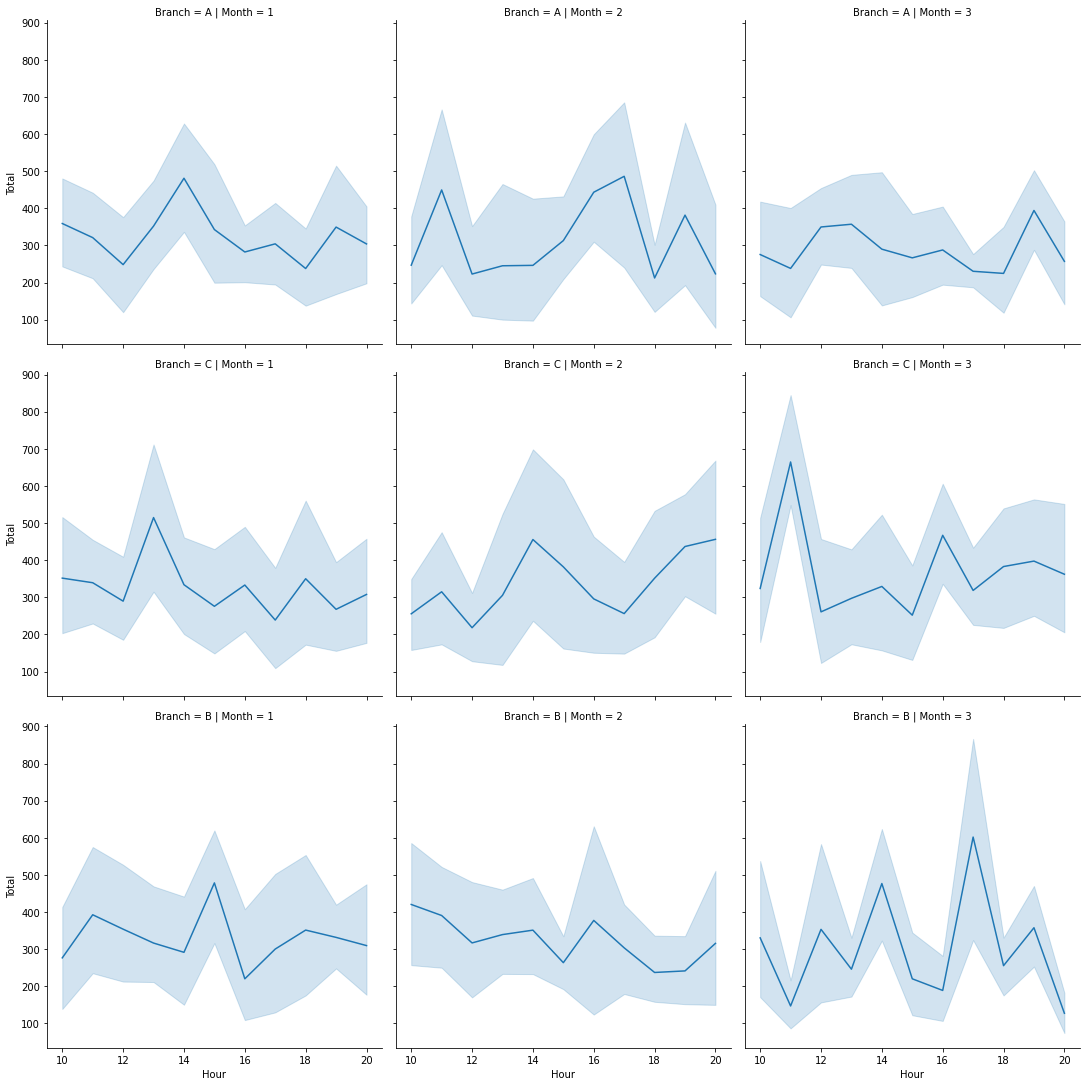

In [357]:
g = return_rel_plot(x_col = 'Hour', y_col = 'Total', col_name = 'Month', row_name = 'Branch', rel_type = 'line')
#g.set(title = "Total sales occuring in each of the Supermarket Branches A, B and C with respect to the month")
plt.show()

We can see the total sales occuring for the different months across the various supermarket branches. For instance, in the 3rd month for Branch B, we can see a spike in the sales in the evening.

#### When do the customers buy certain products in various branches?

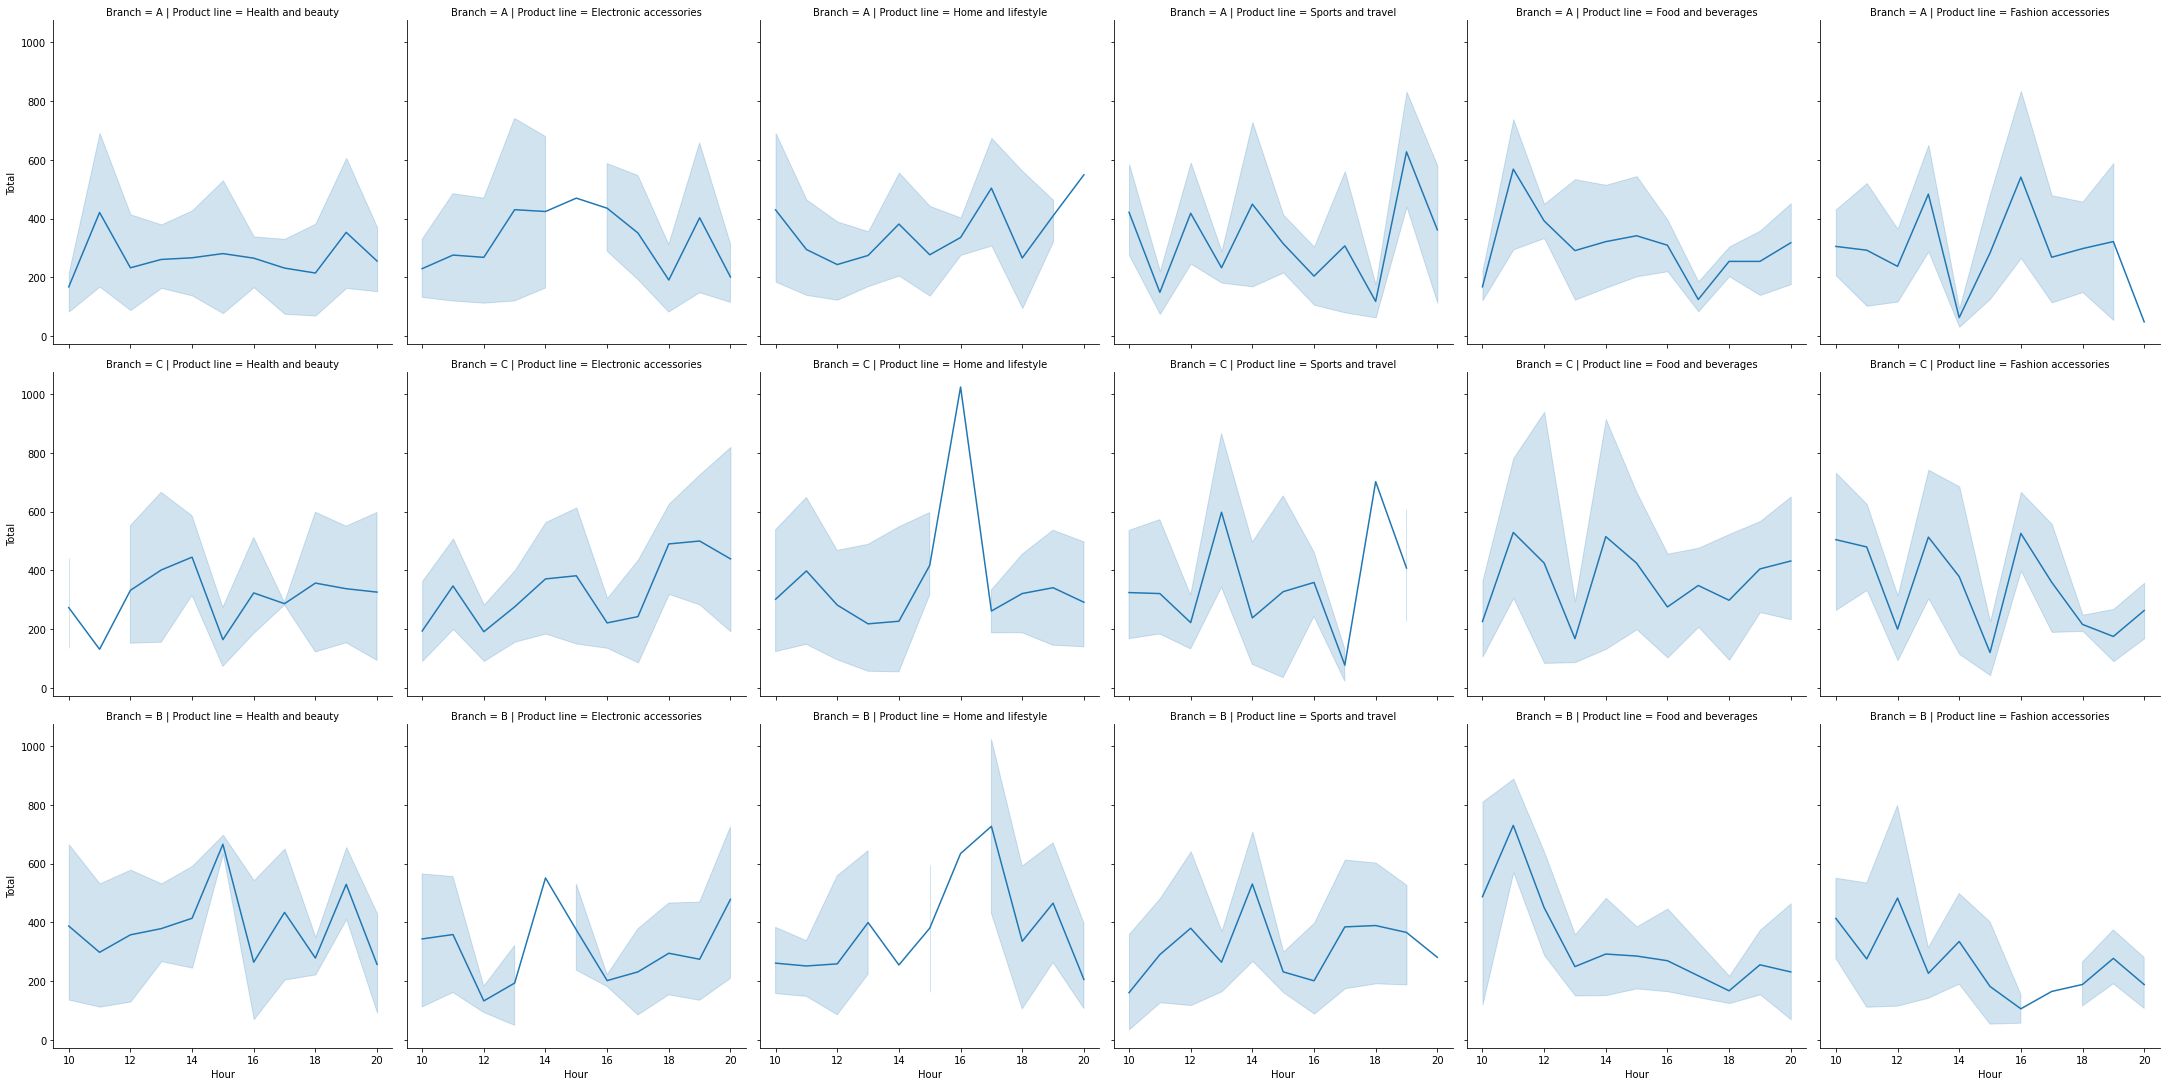

In [358]:
h = return_rel_plot(x_col = 'Hour', y_col = 'Total', col_name = 'Product line', row_name = 'Branch', rel_type = 'line')
plt.show()

From the above graphs, few of the following conclusions that we can make are as follows:

1.) Total Sales for Electronic accessories peaks across all 3 Supermarket Branches around the afternoon time, say 2pm.

2.) Total Sales for Home and lifestyle peaks across Supermarket Branches B and C in the early  evening around 4pm.

3.) Total Sales for Food and beverages shows a spike across all 3 Supermarket Branches in the morning from 10am to 12pm.


#### Performing Product Analysis

Looking at the number of products available in each product line, we can make use of a box plot and take a look at the distribution as follows.

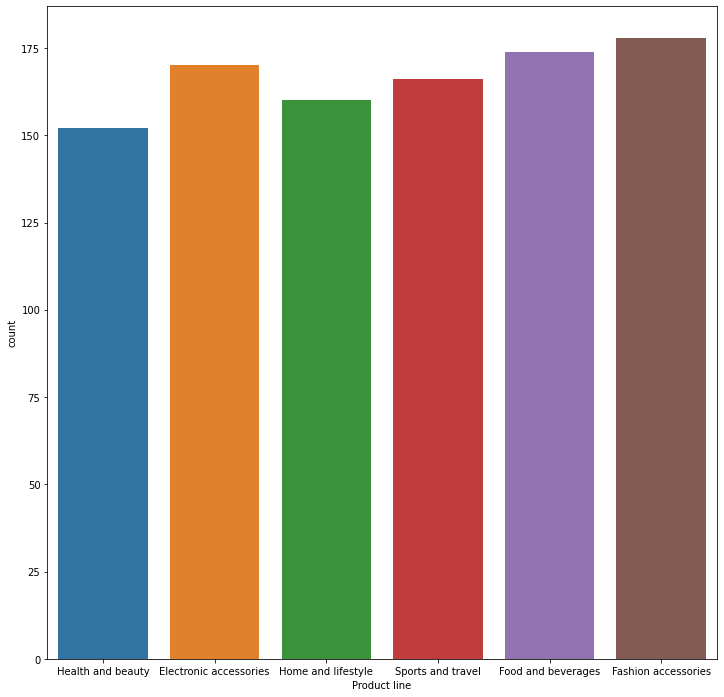

In [359]:
plt.figure(figsize = (12,12))
return_countplot('Product line')
plt.show()

Hence, the count of 'Fashion accessories' is the highest while that of 'Health and beauty' is the lowest.

#### Finding a relationship between gross income and product line

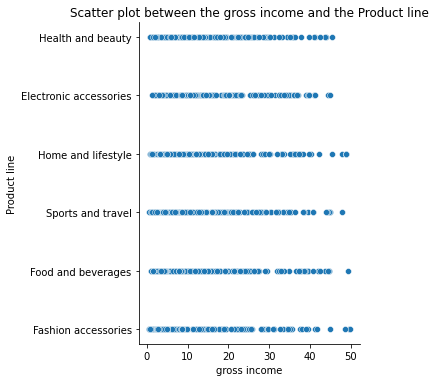

In [360]:
j = return_rel_plot('gross income', 'Product line', rel_type = 'scatter')
j.set(title = "Scatter plot between the gross income and the Product line")
plt.show()

We can see from the above scatter plot that there are a few extra data points around the range of 50 for mainly 'Fashion accessories' and 'Home and lifestyle'. We can conclude that people who can buy these fashion accessories or home and lifestyle products have the maximum gross income.

#### How do customers make the payment in the supermarket?

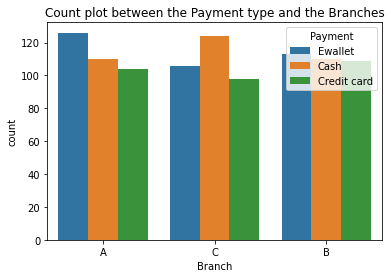

In [361]:
k = return_countplot('Branch', hue_name = 'Payment')
k.set(title = "Count plot between the Payment type and the Branches")
plt.show()

We can see from the above graph that with respect to the Ewallet, Branch A has the maximum transactions compared to Branch B and Branch C. With respect to the cash payment Branch C will dominate. There is only a slight difference in the green bar graphs that represent the credit card payment across the Branches. In that also, Branch A dominates. 

In other words, the payments made by the customers in the supermarket Branch A is mainly through an Ewallet, through Cash Payment in Branch C and through credit card in Branch B.


#### Does the customer type influence the sales?

In [362]:
sales.groupby(['Customer type'])['Total'].median()

Customer type
Member    266.028
Normal    237.426
Name: Total, dtype: float64

In [363]:
sales.groupby(['Customer type'])['Total'].mean()

Customer type
Member    327.791305
Normal    318.122856
Name: Total, dtype: float64

In [364]:
sales.groupby(['Customer type', 'Branch'])['Total'].median()

Customer type  Branch
Member         A         262.4580
               B         258.6780
               C         270.2595
Normal         A         226.0650
               B         231.2415
               C         277.7880
Name: Total, dtype: float64

In [365]:
sales.groupby(['Customer type', 'Branch']).agg({'Total':'sum'})

Total
Customer type Branch            
Member        A       53637.4755
              B       53704.6860
              C       56881.2825
Normal        A       52562.8950
              B       52492.9860
              C       53687.4240

We can see from the above values that the total sales across all the supermarket branches A, B and C is not influenced by the customer type being a member or a normal(non-member).

####  Does the customer type influence customer rating?

In [366]:
sales.groupby(['Branch', 'Customer type'])['Rating'].mean()

Branch  Customer type
A       Member           6.998802
        Normal           7.054335
B       Member           6.770303
        Normal           6.865269
C       Member           7.048521
        Normal           7.098742
Name: Rating, dtype: float64

We can see from the above calculation that the non-members give a slightly higher rating compared to members, but not by a significant margin. Hence, we can conclude that the customer type do not influence the rating.

#### Number of Branches across the different cities

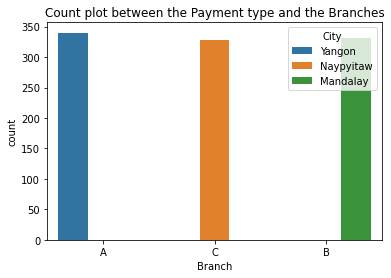

In [367]:
m = return_countplot('Branch', hue_name = 'City')
m.set(title = "Count plot between the Payment type and the Branches")
plt.show()

#### Distribution of the Product Line across the Branches

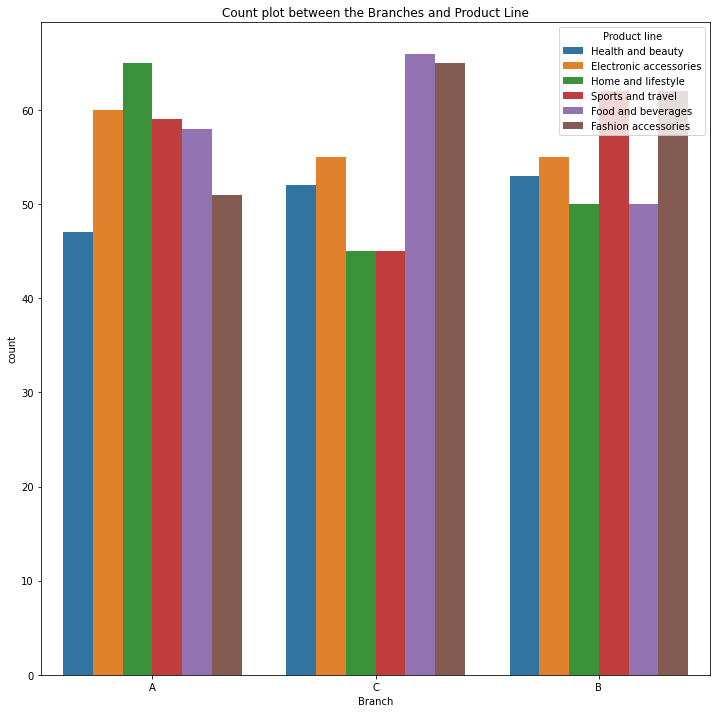

In [368]:
plt.figure(figsize = (12,12))
n = return_countplot('Branch', hue_name = 'Product line')
n.set(title = "Count plot between the Branches and Product Line")
plt.show()

The above graph shows the distribution of the products falling under the 6 categories across the 3 branches.

## Word Cloud Analysis

In [369]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [370]:
from wordcloud import WordCloud

In [371]:
sales['Product line']

0           Health and beauty
1      Electronic accessories
2          Home and lifestyle
3           Health and beauty
4           Sports and travel
                ...          
995         Health and beauty
996        Home and lifestyle
997        Food and beverages
998        Home and lifestyle
999       Fashion accessories
Name: Product line, Length: 1000, dtype: object

In [372]:
#to pass the 'Product line' as a string data structure using join fucntion
' '.join(sales['Product line']) #to join all the observations having space separator

'Health and beauty Electronic accessories Home and lifestyle Health and beauty Sports and travel Electronic accessories Electronic accessories Home and lifestyle Health and beauty Food and beverages Fashion accessories Electronic accessories Electronic accessories Food and beverages Health and beauty Sports and travel Health and beauty Sports and travel Food and beverages Home and lifestyle Electronic accessories Health and beauty Home and lifestyle Electronic accessories Sports and travel Home and lifestyle Fashion accessories Fashion accessories Food and beverages Health and beauty Fashion accessories Sports and travel Sports and travel Health and beauty Food and beverages Sports and travel Sports and travel Electronic accessories Health and beauty Home and lifestyle Home and lifestyle Home and lifestyle Sports and travel Food and beverages Health and beauty Electronic accessories Health and beauty Food and beverages Electronic accessories Fashion accessories Food and beverages Food 

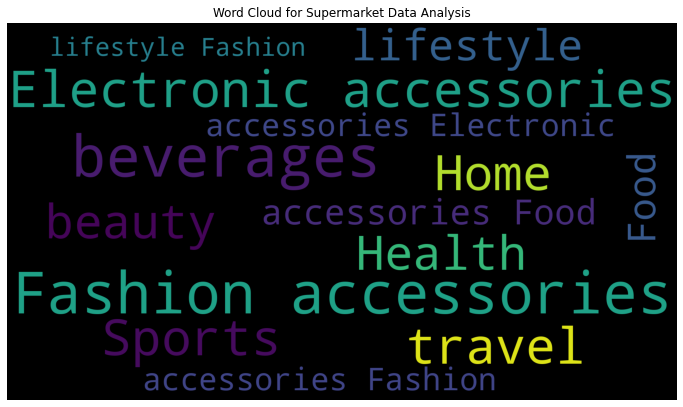

In [373]:
plt.figure(figsize = (12,8))
supermarket_worlcloud = WordCloud(width = 1920, height = 1080).generate(' '.join(sales['Product line']))
plt.imshow(supermarket_worlcloud)
plt.title("Word Cloud for Supermarket Data Analysis")
plt.axis('off')
plt.show()

We can see from the word cloud above that the products are mainly related to Fashion accessories, Lifestyle products and Food and Beverages.

## Label Encoding

Label Encoding is a technique used to turn categorical variables to numeric values. Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [374]:
sales.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Day                                 int64
Month                               int64
Year                                int64
Hour                                int64
Minute                              int64
Second                              int64
dtype: object

In [375]:
list_cols = list(sales.columns)
list_cols

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Unit price',
 'Quantity',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'Payment',
 'cogs',
 'gross margin percentage',
 'gross income',
 'Rating',
 'Day',
 'Month',
 'Year',
 'Hour',
 'Minute',
 'Second']

In [376]:
list_categories = []
for i in list_cols:
    if sales[i].dtypes == 'object':
        list_categories.append(i)  # takes only the values Invoice ID, Branch, City,
                                   # Customer type, Gender, Product line and Payment      
    

In [377]:
list_categories

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [378]:
le = LabelEncoder()
for i in list_categories:
    sales[i] = le.fit_transform(sales[i])

In [379]:
sales.dtypes

Invoice ID                          int64
Branch                              int64
City                                int64
Customer type                       int64
Gender                              int64
Product line                        int64
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                             int64
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Day                                 int64
Month                               int64
Year                                int64
Hour                                int64
Minute                              int64
Second                              int64
dtype: object

In [380]:
# Dropping the Date and Time columns as they are of the datetime datatype
sales = sales.drop('Date', axis = 1)
sales = sales.drop('Time', axis = 1)

In [381]:
sales.dtypes

Invoice ID                   int64
Branch                       int64
City                         int64
Customer type                int64
Gender                       int64
Product line                 int64
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Payment                      int64
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
Day                          int64
Month                        int64
Year                         int64
Hour                         int64
Minute                       int64
Second                       int64
dtype: object

In [382]:
sales.shape

(1000, 21)

The above dataset is the final preprocessed dataset.

## Train test split

Before splitting our data into train and test parts, we need to separate the dependent and independent columns from the dataset. I am considering the 'Purchase' column as the response variable/ dependent variable.  So, I have removed the 'Quantity' column using the drop function and given it on Y.

The data is split into X and Y where X is the independent dataset and Y is the dependent data variable, which have been separated.

In [383]:
X = sales.drop('Quantity', axis = 1)
Y = sales['Quantity']
X.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute,Second
0,814,0,2,0,0,3,74.69,26.1415,548.9715,2,522.83,4.761905,26.1415,9.1,5,1,2019,13,8,0
1,142,2,1,1,0,0,15.28,3.8200,80.2200,0,76.40,4.761905,3.8200,9.6,8,3,2019,10,29,0
2,653,0,2,1,1,4,46.33,16.2155,340.5255,1,324.31,4.761905,16.2155,7.4,3,3,2019,13,23,0
3,18,0,2,0,1,3,58.22,23.2880,489.0480,2,465.76,4.761905,23.2880,8.4,27,1,2019,20,33,0
4,339,0,2,1,1,5,86.31,30.2085,634.3785,2,604.17,4.761905,30.2085,5.3,8,2,2019,10,37,0


The data is split into X and Y where independent and dependent variables have been separated. We have all the columns in the above dataframe except for the 'Purchase' column.

In [384]:
Y #Target Column (all the Purchases)

0       7
1       5
2       7
3       8
4       7
       ..
995     1
996    10
997     1
998     1
999     7
Name: Quantity, Length: 1000, dtype: int64

## Using 80 percent of the data for training purpose and 20 percent for testing

The train_test_split() Split arrays or matrices into random train and test subsets.

train_test_split():
train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. With this function, you don't need to divide the dataset manually.

By default, Sklearn train_test_split will make random partitions for the two subsets. However, you can also specify a random state for the operation.

Parameters:
X, y. The first parameter is the dataset you're selecting to use.

train_size: This parameter sets the size of the training dataset. There are three options: None, which is the default, Int, which requires the exact number of samples, and float, which ranges from 0.1 to 1.0.

test_size: This parameter specifies the size of the testing dataset. The default state suits the training size. It will be set to 0.25 if the training size is set to default.

random_state: The default mode performs a random split using np.random. Alternatively, you can add an integer using an exact number. It's like setting a seed so that anyone who performs the calculation gets the same values.

In [385]:
# Splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 0)
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (800, 20)
Y_train shape:  (800,)
X_test shape:  (200, 20)
Y_test shape:  (200,)


In [386]:
# StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance
# It transforms the data in such a manner that it has mean as 0 and standard deviation as 1
scaled = StandardScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.transform(X_test)

## Machine Learning Models

#### 1. KNeighborsClassifier

By default, the KNeighborsClassifier looks for the 5 nearest neighbors. We must explicitly tell the classifier to use Euclidean distance for determining the proximity between neighboring points.

In [387]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 7)
KNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [388]:
# predicting on train set
train_preds_KNN = KNN.predict(X_train)

# predicting on test set
test_preds_KNN = KNN.predict(X_test)

In [389]:
r_squared_train = KNN.score(X_train, Y_train)
r_squared_test = KNN.score(X_test, Y_test)

RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train, train_preds_KNN)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test, test_preds_KNN)))

print('R-squared value on train:', r_squared_train)
print('R-squared value on test:', r_squared_test)
print('-'*50)
print("RMSE Training Data = ", str(RMSE_train))
print("RMSE Test Data = ", str(RMSE_test))

R-squared value on train: 0.42125
R-squared value on test: 0.265
--------------------------------------------------
RMSE Training Data =  2.3785499784532593
RMSE Test Data =  2.6664583251946765


In [390]:
# Checking the accuracy of the model
training_score = r_squared_train * 100
print("Training Score: ", training_score)

Training Score:  42.125


We can see that the accuracy of the KNeighbors Classifier Model is 42.125%.

#### 2. Linear Regression

In [391]:
model = LinearRegression()
model.fit(X_train, Y_train) #fitting the model on the training data

LinearRegression()

In [392]:
# Predicting on X_test
Y_predict = model.predict(X_test)

In [393]:
r_squared = r2_score(Y_test, Y_predict)
mae = mean_absolute_error(Y_test, Y_predict)
mse = mean_squared_error(Y_test, Y_predict)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_predict)))

print('R-squared score: ', r_squared)
print('Mean Absolute Error (MSE): ', mae)
print('Mean Squared Error (MSE): ', mse)
print('Root Mean Squared Error: ', rmse)

R-squared score:  0.8133844346656622
Mean Absolute Error (MSE):  0.8995812881434796
Mean Squared Error (MSE):  1.5354682061817981
Root Mean Squared Error:  1.239140107567259


In [394]:
# Checking the accuracy of the model
training_score = r_squared * 100
print("Training Score: ", training_score)

Training Score:  81.33844346656622


We can see that the accuracy of the Linear Regression Model is 81.33%.

#### 3.) Decision Tree Regressor

Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes.The decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.

In [395]:
DT =  DecisionTreeRegressor(max_depth = 9)
DT.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=9)

In [396]:
# predicting on train set
train_preds_DT = DT.predict(X_train)

# predicting on test set
test_preds_DT = DT.predict(X_test)

In [397]:
r_squared_train = DT.score(X_train, Y_train)
r_squared_test = DT.score(X_test, Y_test)

RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train, train_preds_DT)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test, test_preds_DT)))

print('R-squared value on train:', r_squared_train)
print('R-squared value on test:', r_squared_test)
print('-'*50)
print("RMSE Training Data = ", str(RMSE_train))
print("RMSE Test Data = ", str(RMSE_test))

R-squared value on train: 0.9993809874434127
R-squared value on test: 0.9626907891052511
--------------------------------------------------
RMSE Training Data =  0.07302596940672686
RMSE Test Data =  0.5540570859683343


In [398]:
# Checking the accuracy of the model
training_score = r_squared_train * 100
print("Training Score: ", training_score)

Training Score:  99.93809874434127


We can see that the accuracy of the Decision Tree Regressor Model is 99.93%.

#### 4.) Random Forest Classifier

A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [399]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train, Y_train)

RandomForestClassifier()

In [400]:
# predicting on train set
train_preds_RFC = RFC.predict(X_train)

# predicting on test set
test_preds_RFC = RFC.predict(X_test)

In [401]:
r_squared_train = RFC.score(X_train, Y_train)
r_squared_test = RFC.score(X_test, Y_test)

RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train, train_preds_RFC)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test, test_preds_RFC)))

print('R-squared value on train:', r_squared_train)
print('R-squared value on test:', r_squared_test)
print('-'*50)
print("RMSE Training Data = ", str(RMSE_train))
print("RMSE Test Data = ", str(RMSE_test))

R-squared value on train: 1.0
R-squared value on test: 0.57
--------------------------------------------------
RMSE Training Data =  0.0
RMSE Test Data =  0.9192388155425117


In [402]:
# Checking the accuracy of the model
training_score = r_squared_train * 100
print("Training Score: ", training_score)

Training Score:  100.0


We can see that the accuracy of the Random Forest Classifier Model is 100.00%.

#### 5.) Gradient Boosting Classifier

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.

In [403]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train, Y_train)

GradientBoostingClassifier()

In [404]:
# predicting on train set
train_preds_GBC = GBC.predict(X_train)

# predicting on test set
test_preds_GBC = GBC.predict(X_test)

In [405]:
r_squared_train = GBC.score(X_train, Y_train)
r_squared_test = GBC.score(X_test, Y_test)

RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train, train_preds_GBC)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test, test_preds_GBC)))

print('R-squared value on train:', r_squared_train)
print('R-squared value on test:', r_squared_test)
print('-'*50)
print("RMSE Training Data = ", str(RMSE_train))
print("RMSE Test Data = ", str(RMSE_test))

R-squared value on train: 1.0
R-squared value on test: 0.68
--------------------------------------------------
RMSE Training Data =  0.0
RMSE Test Data =  0.7483314773547883


In [406]:
# Checking the accuracy of the model
training_score = r_squared_train * 100
print("Training Score: ", training_score)

Training Score:  100.0


We can see that the accuracy of the Gradient Boosting Classifier Model is 100.00%.

Accuracy of the different Models are on the training set are:
   
1.) KNeighborsClassifier = 42.125%.

2.) Linear Regression Model = 81.33%.

3.) Decision Tree Regressor = 99.93%

4.) Random Forest Classifier = 100.00%

5.) Gradient Boosting Classifier = 100.00%.



We got a good accuracy of about 100% using Random Forest Classifier and Gradient Boosting Classifier which is quite well for the given dataset.

## Conclusion

We can see that Naypyitaw is the city that has the most gross income followed by Mandalay. We can also see that because of this, the total sales in the city of Naypyitaw is also the highest compared to the other cities. People who can buy the fashion accessories or home and lifestyle products have the maximum gross income. Hence, Branch C and Branch B being surrounded my more affluent people, could make more sales if they hire more employees to help the customers choose items under Fashion accessories  and home and lifestyle products in the early evening time. The supermarket could make a profit out of this.

Even though Branch A(Yangon) has more Home and lifestyle products, the gross income of the neighborhood is relatively lesser than that compared to the other branches. Hence, the superstore could shift some of its Home and lifestyle products to the Branches B and C where there could be more sales for such items.

They could also hire a few employees across all the 3 branches to help customers with Food and beverages products in the morning time as there seems to be a spike in the purchase at that time.

Finally, we can use Random Forest Classifier and Gradient Boosting Classifier Models to predict the number of products that are bought by the customers and see if income influences the type or category of products bought.